In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set default theme
sns.set_theme()

# TODO
Why the fuck people find MN more tiring than TN

## Tablet familiarity

In [3]:
df = pd.read_csv("form_data/familiarity_with_tablet.csv")
df

,How familiar are you with drawing tablet?
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


<AxesSubplot: xlabel='How familiar are you with drawing tablet?', ylabel='Count'>

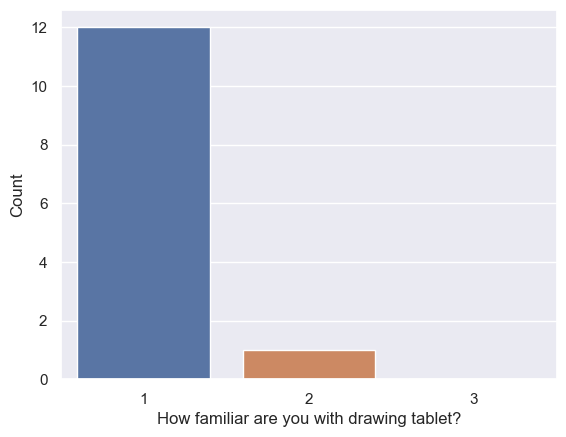

In [4]:
ax = sns.countplot(x=df["How familiar are you with drawing tablet?"], order=[1, 2, 3])
ax.set(ylabel="Count")
ax

## Form results analysis

In [5]:
transformation = {
  'Graphic Table / Bubble': 'TB',
  'Graphic Table / No bubble': 'TN',
  'Mouse / Bubble': 'MB',
  'Mouse / No bubble': 'MN',
}

In [6]:
df = pd.read_csv("form_data/organized.csv")
df["Input method"] = df["Input method"].replace(transformation)
df

,Input method,How mentally demanding was the task?,How physically demanding was the task?,How successful were you in accomplishing what you were asked to do?,How hard did you have to work to accomplish your level of performance?,"How insecure, discouraged, irritated, stressed, and annoyed were you?"
0,TB,2,3,9,3,2
1,TB,7,4,8,5,9
2,TB,2,4,8,1,1
3,TB,6,4,8,6,3
4,TB,1,2,9,1,1
5,TB,5,3,8,7,1
6,TB,5,5,10,2,2
7,TB,6,7,7,6,4
8,TB,3,7,7,5,6
9,TB,5,1,10,1,1


In [7]:
order = ["MN", "TN", "MB", "TB"]

<AxesSubplot: xlabel='Input method', ylabel='How mentally demanding was the task?'>

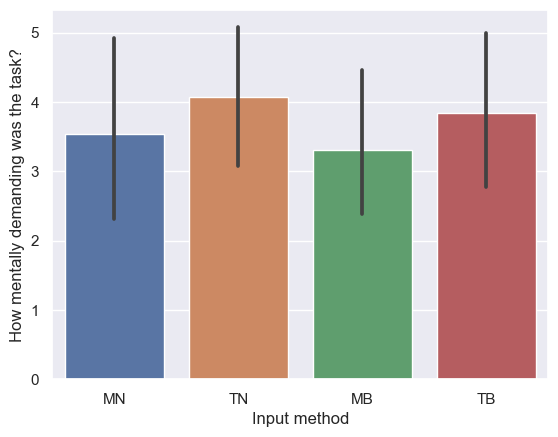

In [8]:
sns.barplot(y="How mentally demanding was the task?", x="Input method", data=df, order=order)

<AxesSubplot: xlabel='Input method', ylabel='How physically demanding was the task?'>

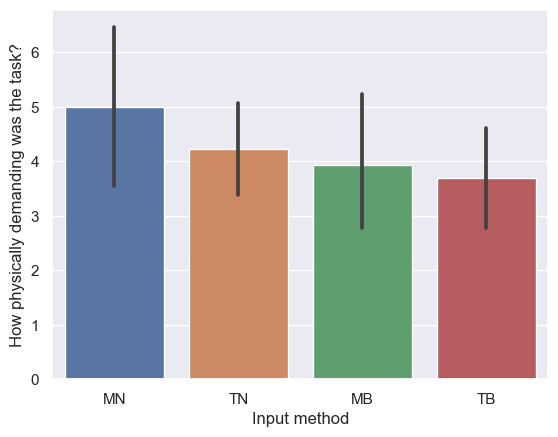

In [9]:
# Maybe look into why mouse / no bubble
sns.barplot(y="How physically demanding was the task?", x="Input method", data=df, order=order)

Text(0, 0.5, 'How successful were you in accomplishing\nwhat you were asked to do?')

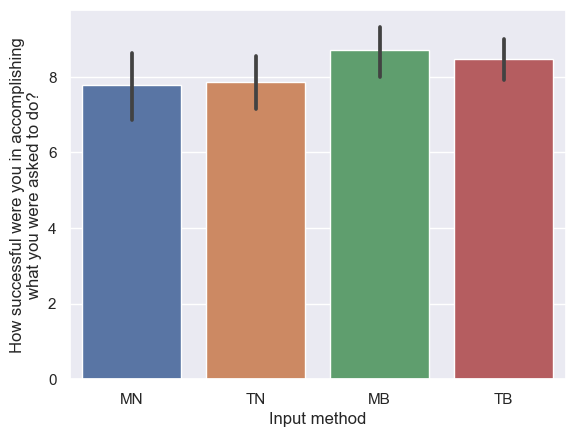

In [10]:
ax = sns.barplot(y="How successful were you in accomplishing what you were asked to do?", x="Input method", data=df, order=order)
ax.set_ylabel(r"How successful were you in accomplishing" + "\n" + "what you were asked to do?")

Text(0, 0.5, 'How hard did you have to work\nto accomplish your level of performance?')

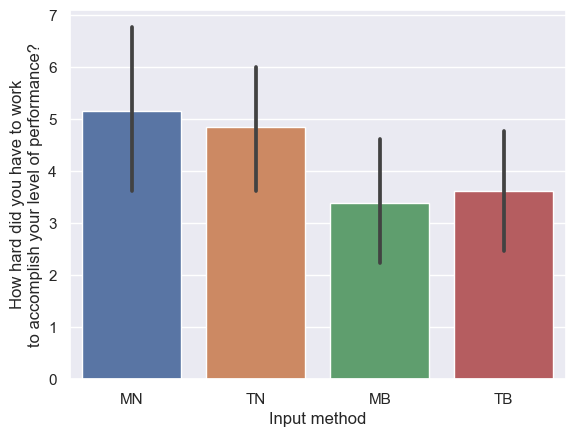

In [11]:
ax = sns.barplot(y="How hard did you have to work to accomplish your level of performance?", x="Input method", data=df, order=order)
ax.set_ylabel(r"How hard did you have to work" + "\n" + "to accomplish your level of performance?")

Text(0, 0.5, 'How insecure, discouraged, irritated,\nstressed, and annoyed were you?')

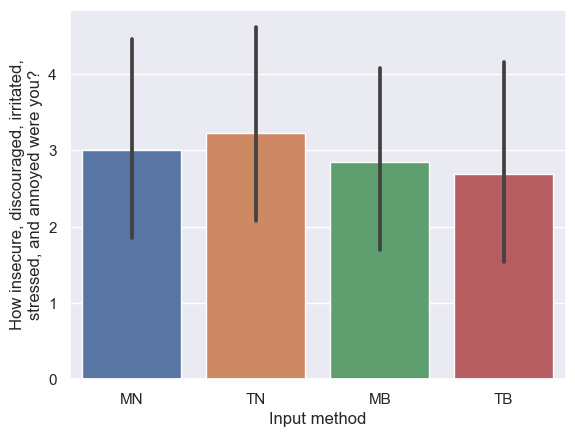

In [12]:
ax = sns.barplot(y="How insecure, discouraged, irritated, stressed, and annoyed were you?", x="Input method", data=df, order=order)
ax.set_ylabel(r"How insecure, discouraged, irritated," + "\n" + "stressed, and annoyed were you?")

In [13]:
df2 = df.melt(id_vars=["Input method"], var_name="Question", value_name="Score")
df2

,Input method,Question,Score
0,TB,How mentally demanding was the task?,2
1,TB,How mentally demanding was the task?,7
2,TB,How mentally demanding was the task?,2
3,TB,How mentally demanding was the task?,6
4,TB,How mentally demanding was the task?,1
...,...,...,...
255,MN,"How insecure, discouraged, irritated, stressed...",1
256,MN,"How insecure, discouraged, irritated, stressed...",2
257,MN,"How insecure, discouraged, irritated, stressed...",4
258,MN,"How insecure, discouraged, irritated, stressed...",6


/opt/homebrew/Caskroom/miniconda/base/envs/m/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


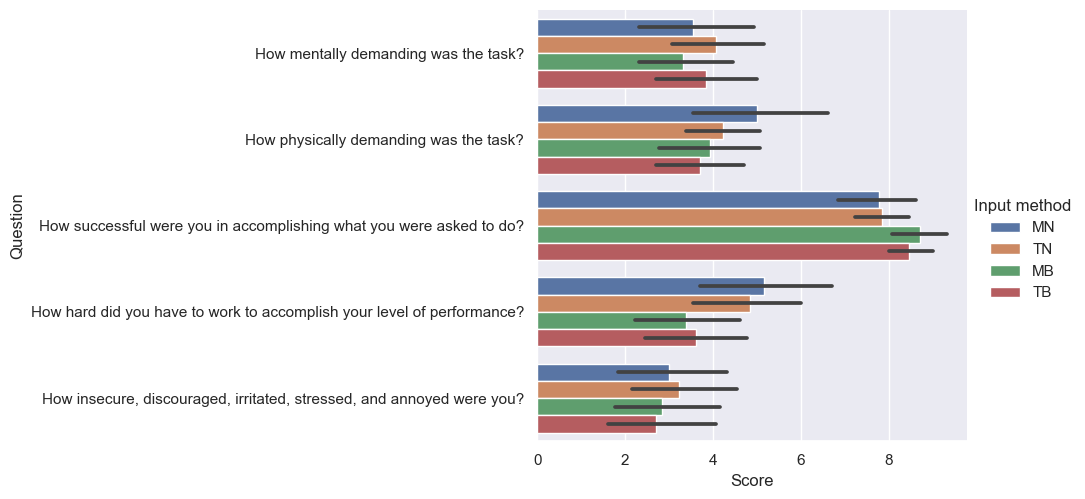

In [14]:
sns.catplot(
  data=df2, kind="bar",
  x="Score", y="Question", hue="Input method", hue_order=order
)

### Bullshit Score

In [15]:
def get_score(row):
  # score are converted from [1, 10] to [0, 9] and flipped 10 become 0 and 1 become 9
  values = [10-n for n in row[1:]] 

  # 3rd question is positively worded so inverse the scale for others
  values[2] = 9-values[2]

  # return input method + score out of 100 (the higher the better)
  return pd.Series([row[0], (sum(values) / 45) * 100])

scores = df.apply(lambda row: get_score(row), axis=1)
scores.columns = (["Input method", "Score"])
scores.groupby("Input method").mean()

,Score
Input method,
MB,76.068376
MN,66.837607
TB,74.700855
TN,67.692308


<AxesSubplot: xlabel='Score', ylabel='Input method'>

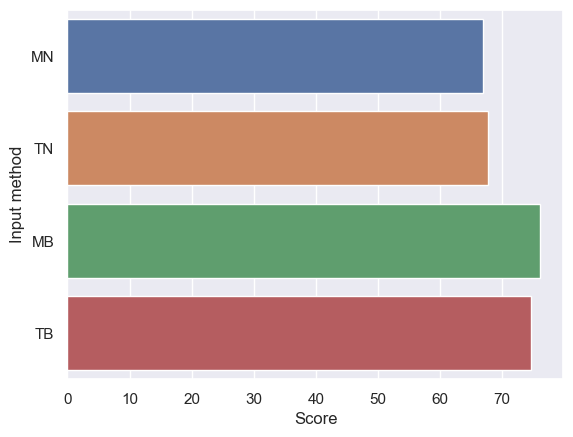

In [16]:
sns.barplot(y="Input method", x="Score", data=scores, errorbar=None, order=order)

<AxesSubplot: xlabel='Score', ylabel='Input method'>

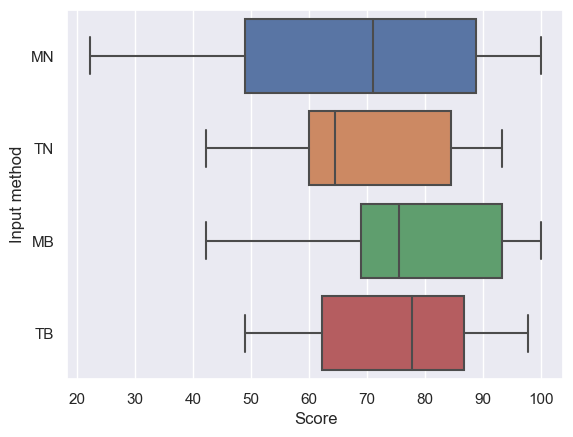

In [17]:
sns.boxplot(y="Input method", x="Score", data=scores, orient="h", order=order)